# Fourier transforms for reflectometry analysis

## Specular reflectometry

In specular neutron reflectometry, we understand that $q_x = 0$ and $q_y = 0$, which is to say that the neutrons are scattered **only** in the surface normal (perpendicular to the plane of the surface), denoted $z$. 
A result of this, is that by applying the [Born approximation](https://en.wikipedia.org/wiki/Born_approximation), the measured reflectometry can be found from the Fourier transform of the **first derivative** of the scattering length density profile with respect to $z$ {cite}`sivia_elementary_2011`.
The sensitivity to the first derivative indicates the importance of the charge of the scattering length density profile. 

```{figure} ../figures/fourier.png
---
width: 500px
align: center
name: fourier-relationship
---
The relationship between the scattering length density and the reflectometry profiles, interacting by a Fourier transform.
```

This means that the reflectometry profile, $R(q)$, can be found under the Born approximation as follows, 

$$
R(q) \approx \frac{16\pi^2}{q^4} \bigg| \int^{\infty}_{-\infty} \frac{\mathrm{d}\beta}{\mathrm{d}z} \mathrm{exp}(\mathit{i}zq) \;\mathrm{d}z \;\bigg| ^2,
$$
where, $\beta(z)$ is the scattering length density profile as a function of $z$. 

## The example of a single interface

```{margin}
This example has been borrowed from the **fantastic** book by Dr Devinder Sivia, "Elementary Scattering Theory: For X-ray and Neutron Users" {cite}`sivia_elementary_2011`. 
```
In order to show the Fourier transform in action, we will first consider the simple example of the interface bewteen air and a flat piece of silicon. 
Let's first visualise the scattering length density, $\beta$, profile of this interface.

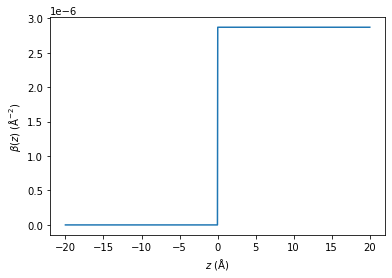

In [1]:
import numpy as np
import matplotlib.pyplot as plt

z = np.linspace(-20, 20, 1000)
rho = np.zeros_like(z)
rho[np.where(z > 0)] = 2.871e-6
plt.plot(z, rho)
plt.xlabel('$z$ (Å)')
plt.ylabel(r'$\beta(z)$ (Å$^{-2}$)')
plt.show()

The functional description of this interface is a [Heaviside function](https://en.wikipedia.org/wiki/Heaviside_step_function). 
The first derivative of this is a scaled-[delta function](https://en.wikipedia.org/wiki/Dirac_delta_function), where the scaling is the change observed in the Heaviside function. 
This first derivative is shown below. 

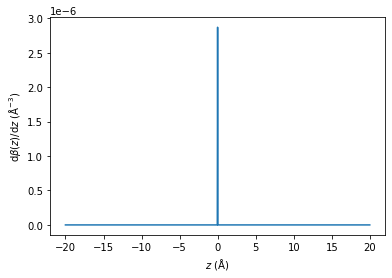

In [2]:
plt.plot(z[:-1], np.diff(rho))
plt.xlabel('$z$ (Å)')
plt.ylabel(r'$\mathrm{d}\beta(z)/\mathrm{d}z$ (Å$^{-3}$)')
plt.show()

The scaled-delta function can be written as, 

$$
\frac{\mathrm{d}\beta(z)}{\mathrm{d}z} = \beta_{\mathrm{Si}} \delta(z),
$$
where, $\beta_{\mathrm{Si}}$ is the scattering length density of silicon ($2.871\times 10^{-6}$ Å<sup>-2</sup>). 
We can then rewrite the equaion above as, 

$$
R(q) \approx \frac{16\pi^2}{q^4} \bigg| \int^{\infty}_{-\infty} \beta_{\mathrm{Si}}\delta(z) \mathrm{exp}(\mathit{i}zq) \;\mathrm{d}z \;\bigg| ^2 = \frac{16\pi^2}{q^4} \bigg| \;\beta_{\mathrm{Si}} \mathrm{exp}(0) \;\bigg| ^2 = \frac{16\pi^2\beta_{\mathrm{Si}}^2}{q^4}.
$$

We can plot this as a function of $q$.

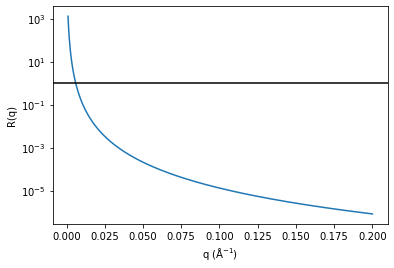

In [3]:
q = np.linspace(0.001, 0.2, 500)
plt.plot(q, 16 * np.pi ** 2 * 2.871e-6 ** 2 / (q ** 4))
plt.axhline(1, c='k')
plt.xlabel('q (Å$^{-1}$)')
plt.ylabel('R(q)')
plt.yscale('log')
plt.show()

The blue line in the figure above shows the reflectometry profile found using the Born approximation for a single silicon-air interface. 
After another example, we will investigate the meaning of the black horizontal line.

## An oxide layer

Let's look again at a smooth sample of silicon, however this time, a 20 Å layer of silicon dioxide has formed on top of it. 
The scattering lenght density profile for this system is shown below, where $\beta_{\mathrm{Si}} = 2.871\times 10^{-6}$ Å<sup>-2</sup> and $\beta_{\mathrm{SiO_2}} = 4.186\times 10^{-6}$ Å<sup>-2</sup>.

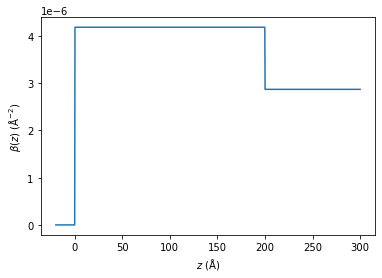

In [4]:
z = np.linspace(-20, 300, 1000)
rho = np.zeros_like(z)
rho[np.where((z > 0) & (z < 200))] = 4.186e-6
rho[np.where(z > 200)] = 2.871e-6
plt.plot(z, rho)
plt.xlabel('$z$ (Å)')
plt.ylabel(r'$\beta(z)$ (Å$^{-2}$)')
plt.show()

Again, we can find the derivative of this scattering length density profile and plot this. 

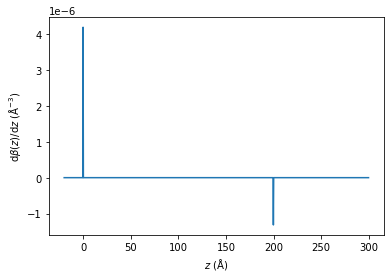

In [5]:
plt.plot(z[:-1], np.diff(rho))
plt.xlabel('$z$ (Å)')
plt.ylabel(r'$\mathrm{d}\beta(z)/\mathrm{d}z$ (Å$^{-3}$)')
plt.show()

Then, to calculate the Born approximated reflected intensity, we use the Fourier transform and scale by $16 \pi^2 / q ^4$.

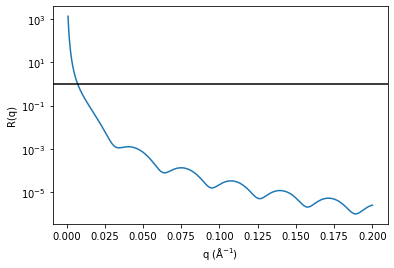

In [6]:
q = np.linspace(0.001, 0.2, 500)
f = (np.diff(rho) * np.exp(
    -1j * z[:-1] * q[:, np.newaxis])).sum(-1)
r = 16 * np.pi ** 2 * np.square(np.abs(f)) / (q ** 4)
plt.plot(q, r)
plt.axhline(1, c='k')
plt.xlabel('q (Å$^{-1}$)')
plt.ylabel('R(q)')
plt.yscale('log')
plt.show()

Again the blue line shows the reflectometry profile. 
The black line (as above) shows where $R(q) = 1$, indicating that, using this approach, as $q$ tends towards $0$ the number of reflected nuetrons becomes greater than the number of neutrons on incident on the sample.
This **unphysical result** is due, in part, to the utilisation of the Born approximation (this is discussed in detail on pg. 104 of "Elementary Scattering Theory: For X-ray and Neutron Users" {cite}`sivia_elementary_2011`. 
```{margin}
Reflected intensity is **explicitly** calculated as the number of reflected neutrons divided by the number of incident neutrons as a function of $q$. 
```

## Using the Born approximation

In addition to the unphysical intensities than can be produced from a Born approximation model, the **phase problem** is still present in this methodology.
The [phase problem](https://en.wikipedia.org/wiki/Phase_problem) is the loss of the radiation phase on measurement. 
This means that, as we will show below, although the thickness information is available from an inverse Fourier transform of measured data. 
A full analysis is not possible without the use of some phase retrival methodology {cite}`majkrzak_phase_1998`. 

These issues do not render the Born approximation useless in reflectometry analysis. 
Instead, it can be used as a quick tool to estimate the thickness of some layered material from a reflectometry profile. 
We can perform an inverse Fourier transform as follows, 

$$
\mathrm{ACF}(z) = \frac{1}{16\pi^2}\int^{\infty}_{-\infty} q^4 R(q) \exp(\mathit{i}zq) \;\mathrm{d}q, 
$$

to obtain the **autocorrelation function** (ACF) from our data. 
The ACF can be thought of as a noisy version of our first derivative of the scattering length density profile. 
The noise is due to the limited $q$-range and resolution from our measurement, below we show the effect of different values of $q_{\mathrm{max}}$. 

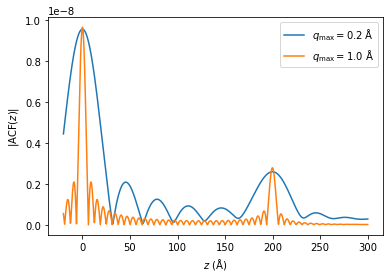

In [8]:
q2 = np.linspace(0.001, 1, 500)
r2 = 16 * np.pi ** 2 * np.square(
    np.abs((np.diff(rho) * np.exp(
        -1j * z[:-1] * q2[:, np.newaxis])).sum(-1))) / (q2 ** 4)
acf = (q ** 4 * r * np.exp(
    1j * q * z[:, np.newaxis])).sum(-1) / (16 * np.pi ** 2)
acf2 = (q2 ** 4 * r2 * np.exp(
    1j * q2 * z[:, np.newaxis])).sum(-1) / (16 * np.pi ** 2)
plt.plot(z, np.abs(acf), label='$q_{\mathrm{max}} = 0.2$ Å')
plt.plot(z, np.abs(acf2), label='$q_{\mathrm{max}} = 1.0$ Å')
plt.xlabel('$z$ (Å)')
plt.ylabel('|ACF($z$)|')
plt.legend()
plt.show()

Note, that the large peaks are at $0$ Å and $200$ Å, indicating that the structure in our data is in the region of $200$ Å in thickness, which matches the layer that was used to produce this data. 